# Analysis of FITS Data and Background Subtraction

This notebook demonstrates the process of loading and analyzing data from FITS files using Python. The primary focus is on creating histograms of time data, identifying background regions, and performing background subtraction to isolate burst events.

## Steps Covered:
1. **Loading FITS Data**: Using the `astropy.io.fits` module to read data from FITS files.
2. **Histogram Creation**: Generating histograms to visualize the distribution of time data.
3. **Background Selection**: Identifying background regions and selecting background data.
4. **Background Modeling**: Fitting a polynomial to the background data.
5. **Background Subtraction**: Subtracting the background model from the original data to highlight burst events.
6. **Visualization**: Plotting the original data, background model, and background-subtracted data for comparison.

Let's get started with the analysis!

## Example 1

In [1]:
from astropy.io import fits
import numpy as np

def load_fits_data(filename):
    with fits.open(filename, memmap=True) as hdul:
        all_count_data = np.array(hdul[2].data)
    return all_count_data['TIME'].astype(float)

In [6]:
times = load_fits_data('Datasets/glg_tte_n1_bn111220486_v00.fit') # You can change the file name here

Let's plot the Light Curve

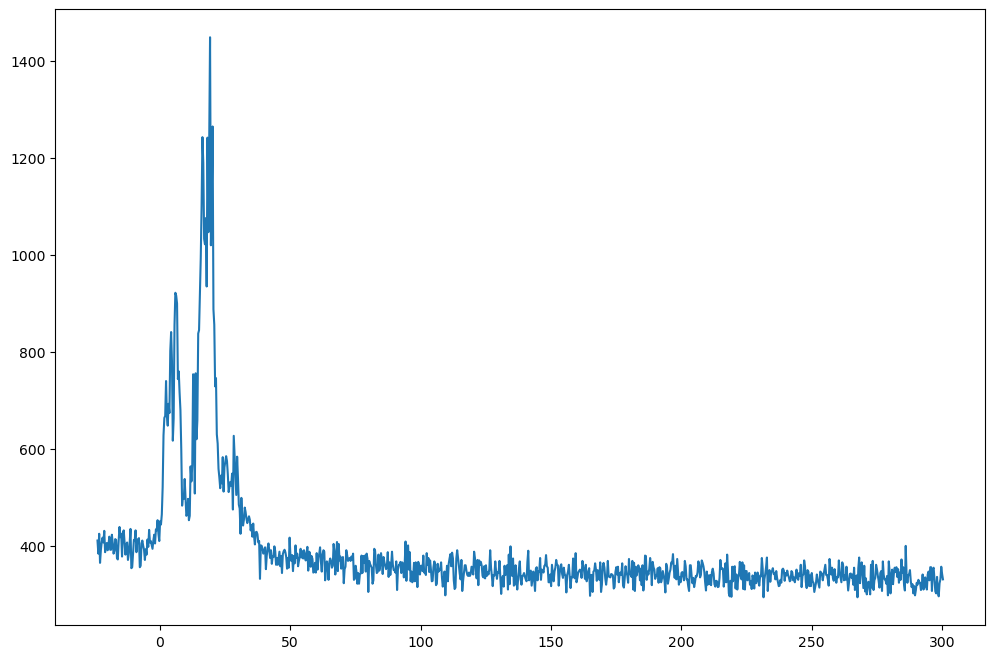

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of the times to get counts
hist, bin_edges = np.histogram(times, bins=1000)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(12, 8))
plt.plot(bin_centers, hist, label='Original')

### Background Subtraction

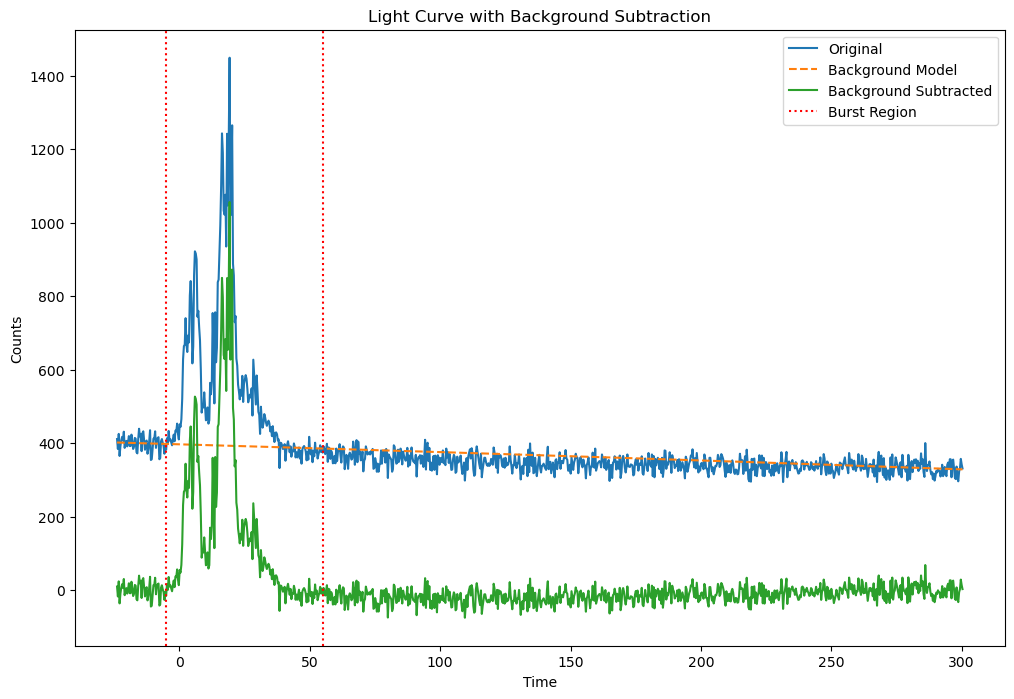

In [7]:
from scipy.optimize import curve_fit

# Create a histogram of the times to get counts
hist, bin_edges = np.histogram(times, bins=1000)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define background regions
bg_region1 = (np.min(bin_centers), np.percentile(bin_centers, 10))
bg_region2 = (np.percentile(bin_centers, 90), np.max(bin_centers))

# User-defined burst region
burst_start = -5  # Replace with your desired start time
burst_end = 55   # Replace with your desired end time

# Function to select background data
def select_background(times, counts, regions, burst_region):
    mask = np.logical_and(
        np.logical_or(
            np.logical_and(times >= regions[0][0], times <= regions[0][1]),
            np.logical_and(times >= regions[1][0], times <= regions[1][1])
        ),
        np.logical_or(times < burst_region[0], times > burst_region[1])
    )
    return times[mask], counts[mask]

# Get background data
bg_times, bg_counts = select_background(bin_centers, hist, (bg_region1, bg_region2), (burst_start, burst_end))

# Define polynomial function (e.g., 2nd order)
def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit polynomial to background
popt, _ = curve_fit(poly_func, bg_times, bg_counts)

# Generate background model for all times
bg_model = poly_func(bin_centers, *popt)

# Subtract background
subtracted_counts = hist - bg_model

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(bin_centers, hist, label='Original')
plt.plot(bin_centers, bg_model, label='Background Model', linestyle='--')
plt.plot(bin_centers, subtracted_counts, label='Background Subtracted')
plt.axvline(x=burst_start, color='r', linestyle=':', label='Burst Region')
plt.axvline(x=burst_end, color='r', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.title('Light Curve with Background Subtraction')
plt.show()

## Example 2

In [7]:
times = load_fits_data('Datasets/glg_tte_n8_bn090719063_v00.fit')

Light Curve Plot

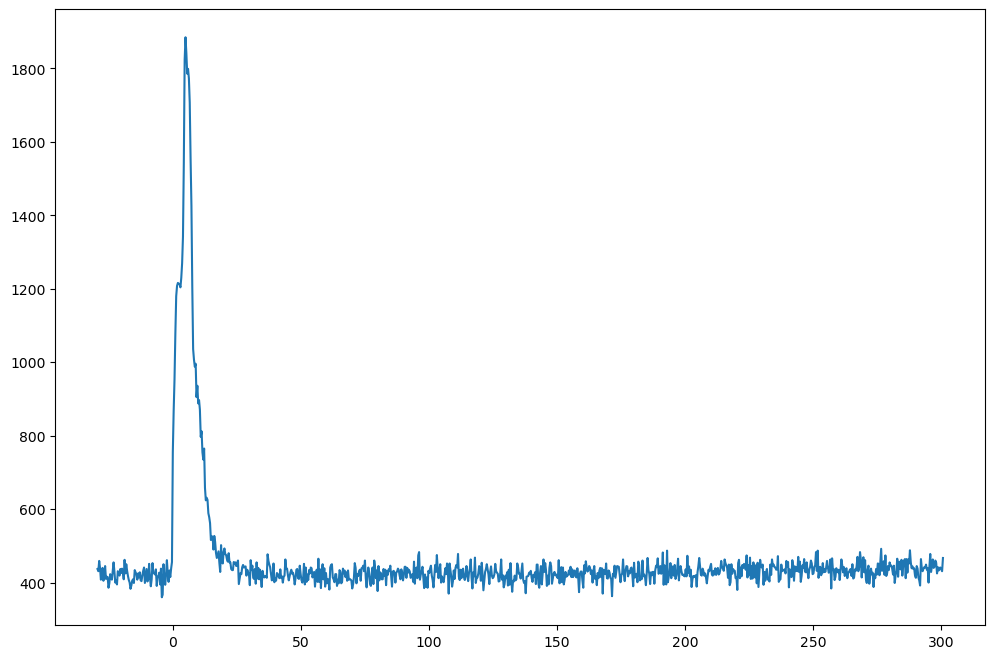

In [8]:
import matplotlib.pyplot as plt
# Create a histogram of the times to get counts
hist, bin_edges = np.histogram(times, bins=1000)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(12, 8))
plt.plot(bin_centers, hist, label='Original')

### Backgroud Subtraction

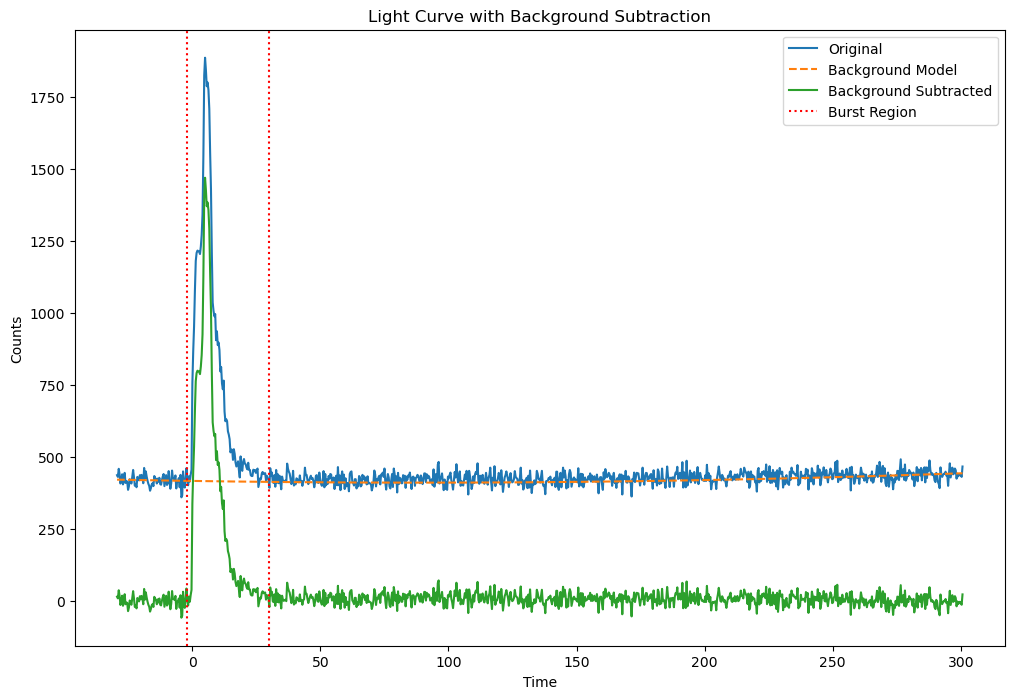

In [9]:
from scipy.optimize import curve_fit

# Create a histogram of the times to get counts
hist, bin_edges = np.histogram(times, bins=1000)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define background regions
bg_region1 = (np.min(bin_centers), np.percentile(bin_centers, 10))
bg_region2 = (np.percentile(bin_centers, 90), np.max(bin_centers))

# User-defined burst region
burst_start = -2  # Replace with your desired start time
burst_end = 30   # Replace with your desired end time

# Function to select background data
def select_background(times, counts, regions, burst_region):
    mask = np.logical_and(
        np.logical_or(
            np.logical_and(times >= regions[0][0], times <= regions[0][1]),
            np.logical_and(times >= regions[1][0], times <= regions[1][1])
        ),
        np.logical_or(times < burst_region[0], times > burst_region[1])
    )
    return times[mask], counts[mask]

# Get background data
bg_times, bg_counts = select_background(bin_centers, hist, (bg_region1, bg_region2), (burst_start, burst_end))

# Define polynomial function (e.g., 2nd order)
def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit polynomial to background
popt, _ = curve_fit(poly_func, bg_times, bg_counts)

# Generate background model for all times
bg_model = poly_func(bin_centers, *popt)

# Subtract background
subtracted_counts = hist - bg_model

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(bin_centers, hist, label='Original')
plt.plot(bin_centers, bg_model, label='Background Model', linestyle='--')
plt.plot(bin_centers, subtracted_counts, label='Background Subtracted')
plt.axvline(x=burst_start, color='r', linestyle=':', label='Burst Region')
plt.axvline(x=burst_end, color='r', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.title('Light Curve with Background Subtraction')
plt.show()